In [ ]:
pip install gillespy2

In [ ]:
pip install --upgrade pip

In [66]:
pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 9.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 8.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 8.3 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [67]:
import gillespy2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
def create_dimerization(paramateres_value=None):
    model = gillespy2.Model(name="dimerization")
    # Parameters
    k_c = gillespy2.Parameter(name='k_c', expression=0.005)
    k_d = gillespy2.Parameter(name='k_d', expression=0.08)
    model.add_parameter([k_c, k_d])
    # Species
    m = gillespy2.Species(name='monomer', initial_value=30)
    d = gillespy2.Species(name='dimer', initial_value=0)
    model.add_species([m, d])
    # Reactions
    r_c = gillespy2.Reaction(name="r_creation", reactants={m: 2}, products={d: 1}, rate=k_c) 
    r_d = gillespy2.Reaction(name="r_dissociation", reactants={d: 1}, products={m: 2}, rate=k_d)
    model.add_reaction([r_c, r_d])
    # Timespan
    tspan = gillespy2.TimeSpan.linspace(t=100, num_points=101)
    model.timespan(tspan)
    return model

In [11]:
model = create_dimerization()

In [12]:
results = model.run(number_of_trajectories=10)

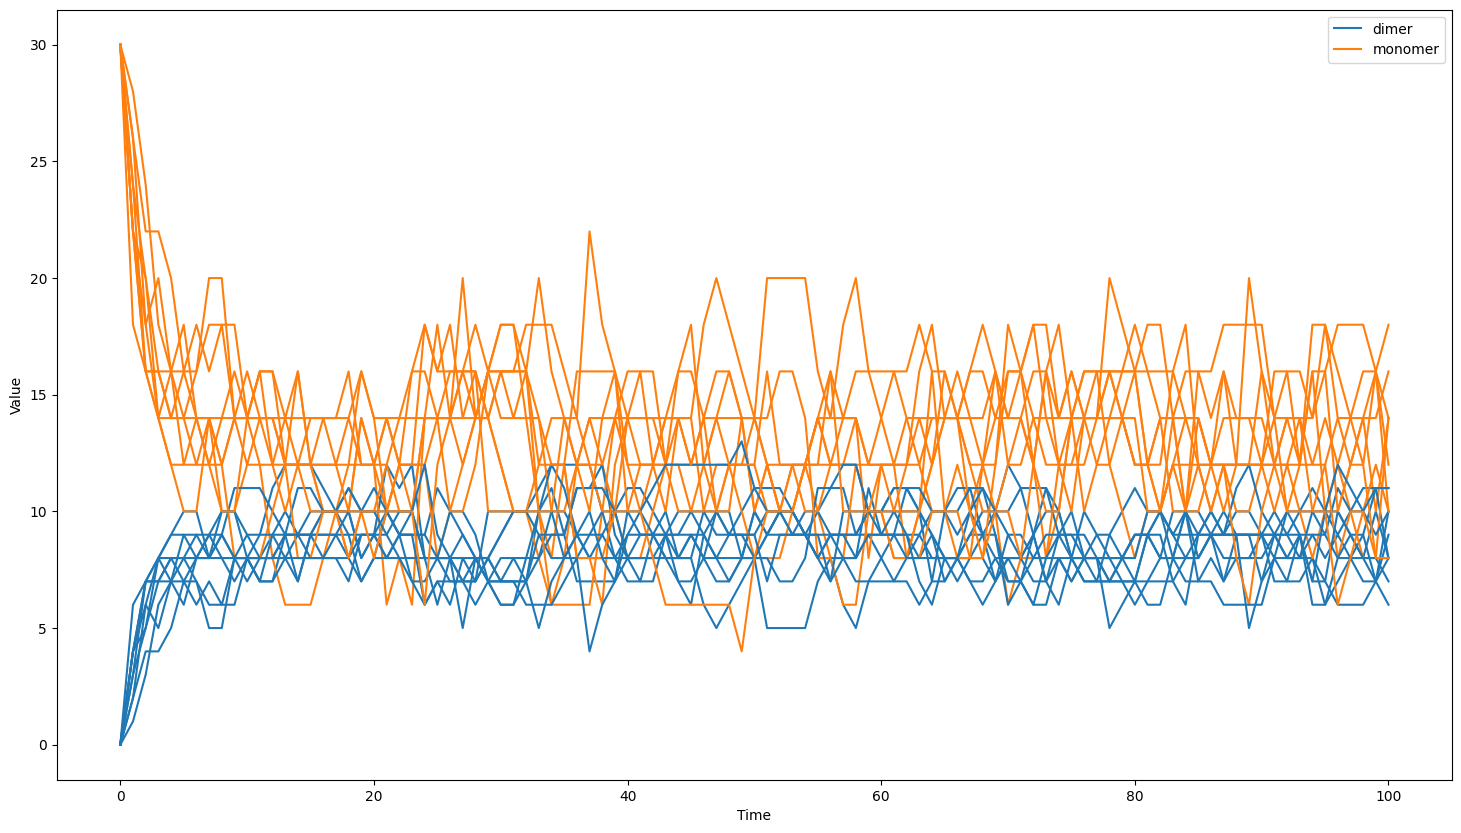

In [13]:
results.plot()

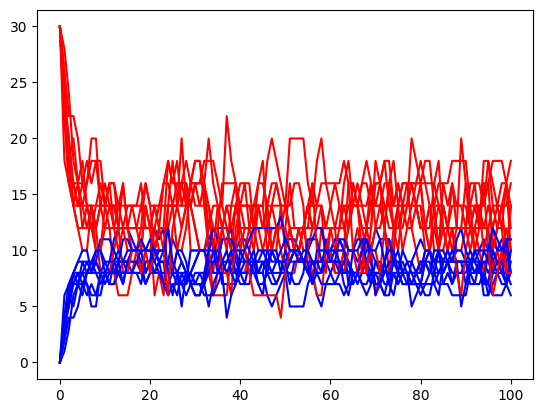

In [16]:
for index in range(0,10):
    trajectory = results[index]
    plt.plot(trajectory['time'], trajectory['monomer'], 'r')
    plt.plot(trajectory['time'], trajectory['dimer'], 'b')

**My model**

In [21]:
def switching_process(paramateres_value=None):
    model = gillespy2.Model(name="switching_process")
    # Parameters
    alpha_minus = gillespy2.Parameter(name='alpha_minus', expression=15.0)
    beta_minus = gillespy2.Parameter(name='beta_minus', expression=0.0)
    alpha_plus = gillespy2.Parameter(name='alpha_plus', expression=10.0)
    beta_plus = gillespy2.Parameter(name='beta_plus', expression=0.0)
    switch_minus = gillespy2.Parameter(name='switch_minus', expression=0.01)
    switch_plus = gillespy2.Parameter(name='switch_plus', expression=0.1)
    model.add_parameter([alpha_minus, beta_minus, alpha_plus, beta_plus, switch_minus, switch_plus])
    # Species
    z_minus = gillespy2.Species(name='z_minus', initial_value=1)
    z_plus = gillespy2.Species(name='z_plus', initial_value=0)
    model.add_species([z_minus, z_plus])
    # Reactions
    birth_minus = gillespy2.Reaction(name="birth_minus", reactants={z_minus: 1}, products={z_minus: 2}, rate=alpha_minus) 
    death_minus = gillespy2.Reaction(name="death_minus", reactants={z_minus: 1}, products={}, rate=beta_minus)
    birth_plus = gillespy2.Reaction(name="birth_plus", reactants={z_plus: 1}, products={z_plus: 2}, rate=alpha_plus) 
    death_plus = gillespy2.Reaction(name="death_plus", reactants={z_plus: 1}, products={}, rate=beta_plus)
    switch_to_minus = gillespy2.Reaction(name="switch_to_minus", reactants={z_plus: 1}, products={z_minus: 1, z_plus: 1}, rate=switch_minus)
    switch_to_plus = gillespy2.Reaction(name="switch_to_plus", reactants={z_minus: 1}, products={z_minus: 1, z_plus: 1}, rate=switch_plus)
    model.add_reaction([birth_minus, death_minus, birth_plus, death_plus, switch_to_minus, switch_to_plus])
    # Timespan
    tspan = gillespy2.TimeSpan.linspace(t=1.0, num_points=101)
    model.timespan(tspan)
    return model

In [22]:
switching_model = switching_process()

In [51]:
switching_results = switching_model.run(number_of_trajectories=20)

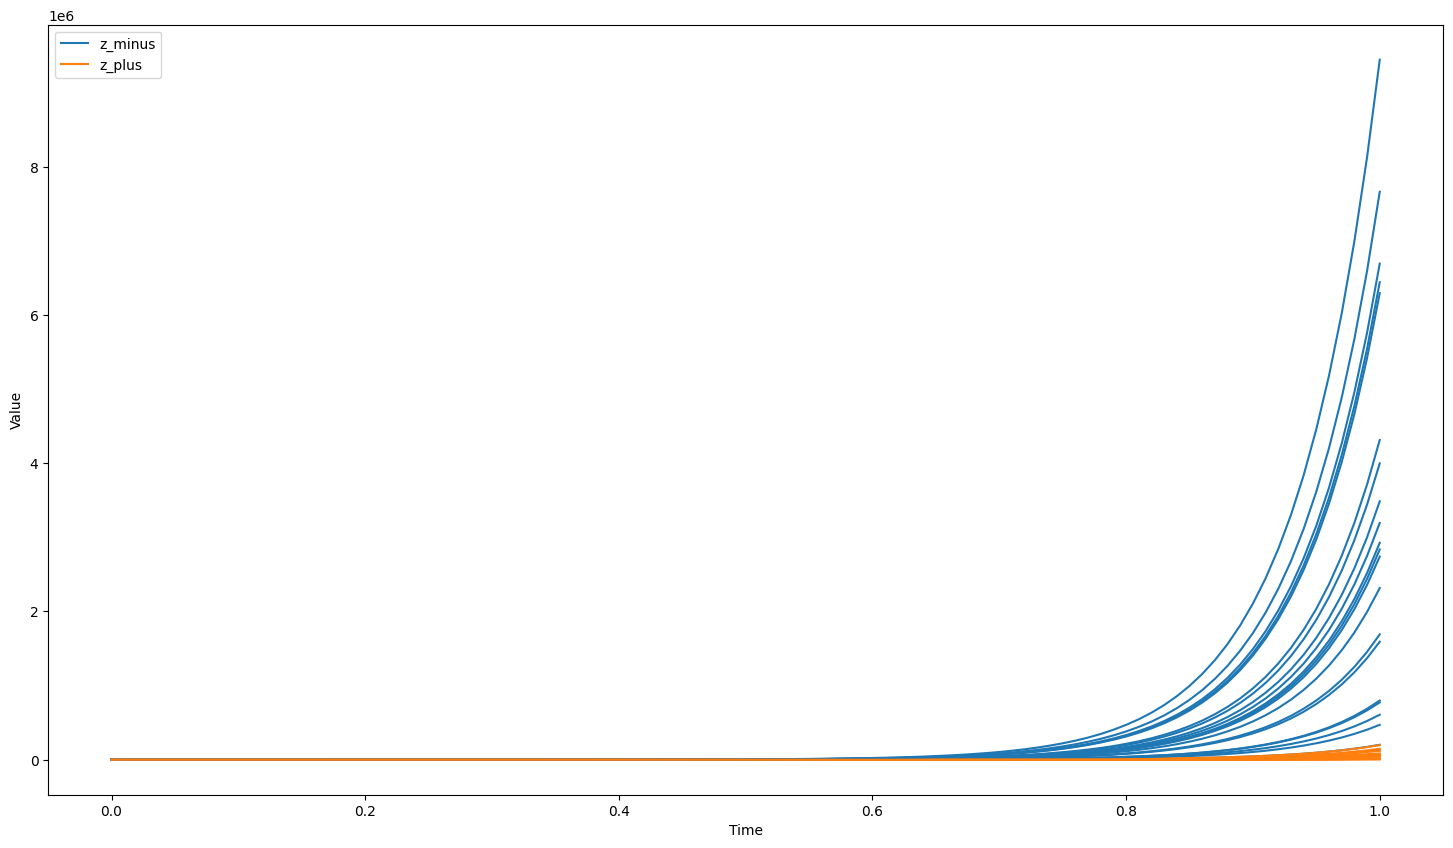

In [52]:
switching_results.plot()

In [32]:
type(trajectory)

gillespy2.core.results.Trajectory

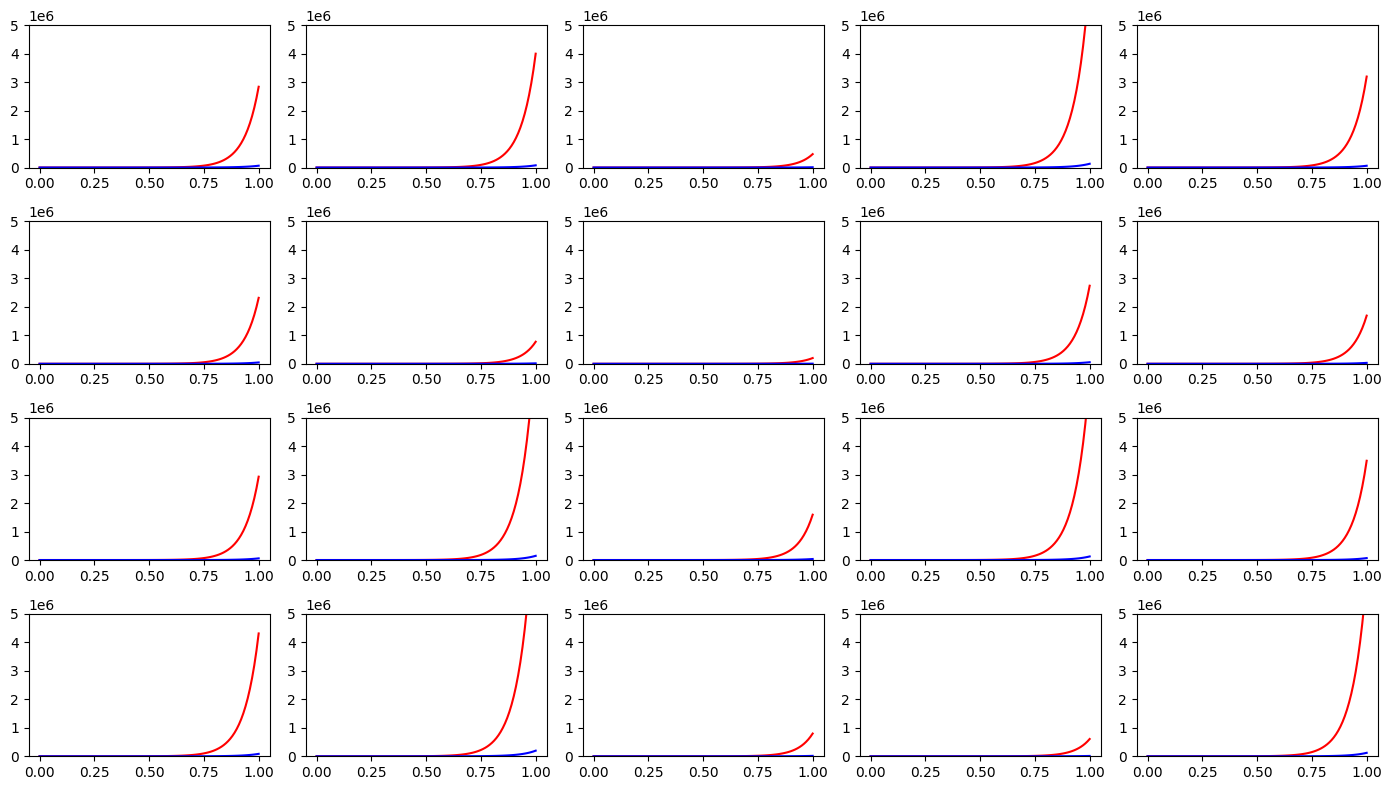

In [57]:
fig,axs = plt.subplots(4,5, figsize=(14,8))
for j in range(0,4):
    for i in range(0,5):
        axs[j,i].plot(switching_results[5*j+i]['time'], switching_results[i+j*5]['z_minus'], 'r')
        axs[j,i].plot(switching_results[5*j+i]['time'], switching_results[i+j*5]['z_plus'], 'b')
        axs[j,i].set_ylim(0,5e6)
        #axs[i,j].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.tight_layout() 

In [71]:
switching_results.to_array()[0]

array([[      0.  ,       1.  ,       0.  ],
       [      0.01,       1.  ,       0.  ],
       [      0.02,       1.  ,       0.  ],
       [      0.03,       1.  ,       0.  ],
       [      0.04,       1.  ,       0.  ],
       [      0.05,       1.  ,       0.  ],
       [      0.06,       2.  ,       0.  ],
       [      0.07,       2.  ,       0.  ],
       [      0.08,       3.  ,       0.  ],
       [      0.09,       3.  ,       0.  ],
       [      0.1 ,       4.  ,       0.  ],
       [      0.11,       4.  ,       0.  ],
       [      0.12,       4.  ,       0.  ],
       [      0.13,       4.  ,       0.  ],
       [      0.14,       7.  ,       1.  ],
       [      0.15,       7.  ,       1.  ],
       [      0.16,       7.  ,       2.  ],
       [      0.17,       7.  ,       2.  ],
       [      0.18,       8.  ,       2.  ],
       [      0.19,       8.  ,       2.  ],
       [      0.2 ,      10.  ,       2.  ],
       [      0.21,      13.  ,       3.  ],
       [  

In [85]:
df = pd.DataFrame(switching_results.to_array()[4], columns=['time', 'z_minus', 'z_plus'])

In [78]:
print(df)

     time    z_minus   z_plus
0    0.00        1.0      0.0
1    0.01        1.0      0.0
2    0.02        1.0      0.0
3    0.03        1.0      0.0
4    0.04        2.0      0.0
..    ...        ...      ...
96   0.96  2195128.0  42180.0
97   0.97  2550470.0  49184.0
98   0.98  2961921.0  57405.0
99   0.99  3441945.0  66668.0
100  1.00  3998467.0  77550.0

[101 rows x 3 columns]


In [86]:
df.to_csv('./Gillespy2/switching_results_5.csv')